# **Task 4**

## **DJS Synapse Learning Period**
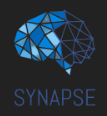

Congratulations on making it this far!! Welcome to the world of classification where we move on from unsupervised to helping the algorithms by telling them exactly what the data we're feeding them is. This week we'll be looking into  many algorithms such as Decision Trees, SVC, Naive Bayes, Random Forest and so on. We'll also be delving into hyperparameter tuning the only place where ched chaad can lead to a good result.

**Warning: This task contains many theory questions. Proceed with caution!**

Jk, make sure you research well and make sure you are understanding the models y'all are implementing as that will make your concepts much stronger and build a strong ML foundation which will be very useful as we move further with the tasks.

### Overfitting and Underfitting [VERY IMPORTANT]:
https://www.youtube.com/watch?v=T9NtOa-IITo
Note : This concept can be seen in K Means and decision trees. In fact, we will look deeper into
this when we begin deep learning.

## Importing the dataset

Use this link to download the adult income dataset and upload it to your drive.

https://drive.google.com/file/d/1VAE1qF16D-sKnBOWXzGXVNGhtNZNLFQS/view?usp=sharing

In [37]:
from google.colab import drive
drive.mount('/content/drive')
import matplotlib.pyplot as plt

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [38]:
#import your dataset here
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/adult_income_dataset.csv')
df

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


## Dealing with Nan values

In [39]:
#write a code to find the nan values for the dataset and make a decision on whether to dropna or fill na
df.dropna()
df

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


## Object Valued Columns

For Relationship, Race and Sex find out the max division average fnlwgt for each unique value.

In [40]:
#Write your code here
print(df.groupby('relationship')['fnlwgt'].max(), '\n')
print(df.groupby('race')['fnlwgt'].max(), '\n')
print(df.groupby('sex')['fnlwgt'].max(), '\n')

relationship
Husband           1226583
Not-in-family     1455435
Other-relative     709445
Own-child         1268339
Unmarried         1484705
Wife               953588
Name: fnlwgt, dtype: int64 

race
Amer-Indian-Eskimo     445168
Asian-Pac-Islander     506329
Black                 1268339
Other                  481175
White                 1484705
Name: fnlwgt, dtype: int64 

sex
Female    1484705
Male      1455435
Name: fnlwgt, dtype: int64 



## Getting rid of unnecessary columns

*   Drop the education num column since we already have their education in the form of categories
*   Check the combinations of the marital-status and relationship column, see if we need both of them or just marital status will work too.


In [41]:
df.drop('education-num', axis=1, inplace=True)
print(df.head(5))

   age         workclass  fnlwgt  education      marital-status  \
0   39         State-gov   77516  Bachelors       Never-married   
1   50  Self-emp-not-inc   83311  Bachelors  Married-civ-spouse   
2   38           Private  215646    HS-grad            Divorced   
3   53           Private  234721       11th  Married-civ-spouse   
4   28           Private  338409  Bachelors  Married-civ-spouse   

          occupation   relationship   race     sex  capital-gain  \
0       Adm-clerical  Not-in-family  White    Male          2174   
1    Exec-managerial        Husband  White    Male             0   
2  Handlers-cleaners  Not-in-family  White    Male             0   
3  Handlers-cleaners        Husband  Black    Male             0   
4     Prof-specialty           Wife  Black  Female             0   

   capital-loss  hours-per-week native-country income  
0             0              40  United-States  <=50K  
1             0              13  United-States  <=50K  
2             0     

In [42]:
#write your code here

crosstab = pd.crosstab(df['marital-status'], df['relationship']) #shows the spread of relationship over marital status
print(crosstab, '\n')

#kind of a matrix display with relationship unique values as columns and marital status unique values as row

uni_combo = df[['marital-status', 'relationship']].drop_duplicates()
print(uni_combo, '\n')
# gives the combination's unique values and the index where it is unique

#getting unique values total
print(len(uni_combo))
print(df['marital-status'].nunique())
print(df['relationship'].nunique())


relationship           Husband  Not-in-family  Other-relative  Own-child  \
marital-status                                                             
Divorced                     0           2404             110        328   
Married-AF-spouse            9              0               1          1   
Married-civ-spouse       13184             17             124         95   
Married-spouse-absent        0            211              32         45   
Never-married                0           4706             611       4485   
Separated                    0            420              55         99   
Widowed                      0            547              48         15   

relationship           Unmarried  Wife  
marital-status                          
Divorced                    1601     0  
Married-AF-spouse              0    12  
Married-civ-spouse             0  1556  
Married-spouse-absent        130     0  
Never-married                881     0  
Separated                   

From above crosstab analysis we see that there are many unique combinations which means that relationship gives us additional information along with marital status and only one will not be sufficient. Hence we will need both in the dataset.

## Dealing with Categorical Data
As you probably know by now, the ML models dont know how to deal with String or object type data... so your mission shall you choose to accept it (don't really have much of a choice) is to find out which columns to do one hot encoding on and which columns to do Label Encoding on.

**Hint: Since Marital-status has less number of columns, One Hot encode it**

In [43]:
#Write your code here
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

object_cols = df.select_dtypes(include=['object']).columns
print(object_cols)

for cat in object_cols:

  if cat !='income':                   #not changing the income column right now as we need to work on it later on
    i = df[cat].nunique()
    print(i)
    if i <= 10 :                             #if unique values are less then doing one hot encoding as this will avoid priority problem
      df = pd.get_dummies(df, columns=[cat], dtype='int')
    else:                                      #else doing label encoding
      df[cat]=label_encoder.fit_transform(df[cat])


df.head()

Index(['workclass', 'education', 'marital-status', 'occupation',
       'relationship', 'race', 'sex', 'native-country', 'income'],
      dtype='object')
8
16
7
14
6
5
2
41


,age,fnlwgt,education,occupation,capital-gain,capital-loss,hours-per-week,native-country,income,workclass_Federal-gov,...,relationship_Own-child,relationship_Unmarried,relationship_Wife,race_Amer-Indian-Eskimo,race_Asian-Pac-Islander,race_Black,race_Other,race_White,sex_Female,sex_Male
0,39,77516,9,0,2174,0,40,38,<=50K,0,...,0,0,0,0,0,0,0,1,0,1
1,50,83311,9,3,0,0,13,38,<=50K,0,...,0,0,0,0,0,0,0,1,0,1
2,38,215646,11,5,0,0,40,38,<=50K,0,...,0,0,0,0,0,0,0,1,0,1
3,53,234721,1,5,0,0,40,38,<=50K,0,...,0,0,0,0,0,1,0,0,0,1
4,28,338409,9,9,0,0,40,4,<=50K,0,...,0,0,1,0,0,1,0,0,1,0


In [44]:
print(df.head(5))

   age  fnlwgt  education  occupation  capital-gain  capital-loss  \
0   39   77516          9           0          2174             0   
1   50   83311          9           3             0             0   
2   38  215646         11           5             0             0   
3   53  234721          1           5             0             0   
4   28  338409          9           9             0             0   

   hours-per-week  native-country income  workclass_Federal-gov  ...  \
0              40              38  <=50K                      0  ...   
1              13              38  <=50K                      0  ...   
2              40              38  <=50K                      0  ...   
3              40              38  <=50K                      0  ...   
4              40               4  <=50K                      0  ...   

   relationship_Own-child  relationship_Unmarried  relationship_Wife  \
0                       0                       0                  0   
1       

## Altering the Target Column
Modify the Target Column (income) to make sure that all the values which are <=50K are replaced with a 0 and the values >50K are replaced with a 1.

In [45]:
#write your code here
df['income'] = df['income'].map({'<=50K': 0, '>50K': 1})
print(df.head(5))
df['income']

   age  fnlwgt  education  occupation  capital-gain  capital-loss  \
0   39   77516          9           0          2174             0   
1   50   83311          9           3             0             0   
2   38  215646         11           5             0             0   
3   53  234721          1           5             0             0   
4   28  338409          9           9             0             0   

   hours-per-week  native-country  income  workclass_Federal-gov  ...  \
0              40              38       0                      0  ...   
1              13              38       0                      0  ...   
2              40              38       0                      0  ...   
3              40              38       0                      0  ...   
4              40               4       0                      0  ...   

   relationship_Own-child  relationship_Unmarried  relationship_Wife  \
0                       0                       0                  0   
1 

,income
0,0
1,0
2,0
3,0
4,0
...,...
32556,0
32557,1
32558,0
32559,0


**Extract the target column(income) and store it in a seperate variable and remove it from the original dataset. Additionally, do a 70:30 Train Test Split**

In [46]:
#write your code here
df_income = df['income']
print(df_income)
df.drop('income', axis=1, inplace=True)
df.head()

0        0
1        0
2        0
3        0
4        0
        ..
32556    0
32557    1
32558    0
32559    0
32560    1
Name: income, Length: 32561, dtype: int64


,age,fnlwgt,education,occupation,capital-gain,capital-loss,hours-per-week,native-country,workclass_Federal-gov,workclass_Local-gov,...,relationship_Own-child,relationship_Unmarried,relationship_Wife,race_Amer-Indian-Eskimo,race_Asian-Pac-Islander,race_Black,race_Other,race_White,sex_Female,sex_Male
0,39,77516,9,0,2174,0,40,38,0,0,...,0,0,0,0,0,0,0,1,0,1
1,50,83311,9,3,0,0,13,38,0,0,...,0,0,0,0,0,0,0,1,0,1
2,38,215646,11,5,0,0,40,38,0,0,...,0,0,0,0,0,0,0,1,0,1
3,53,234721,1,5,0,0,40,38,0,0,...,0,0,0,0,0,1,0,0,0,1
4,28,338409,9,9,0,0,40,4,0,0,...,0,0,1,0,0,1,0,0,1,0


In [47]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(df,df_income,test_size=0.3, random_state=1)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(22792, 36)
(9769, 36)
(22792,)
(9769,)


### Chalo now that we have the preprocessed data we can feed it into the models. Lets start with some basic ones.

# Logistic Regression
*   Theory:https://www.youtube.com/watch?v=yIYKR4sgzI8&list=PLblh5JKOoLUKxzEP5HA2d-Li7IJkHfXSe
*   Implementation: https://www.youtube.com/watch?v=n40hS9tQmcY


Explain the algorithm, its working and its use cases.

HHHHHHHHHHHHHHHHHHHHHHHHHHHHHH
HHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHH

In [48]:
#import the model and apply it to the data
from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression()

In [49]:
from sklearn.model_selection import GridSearchCV
parameter = {'penalty':['l1','l2','elasticnet'],'C':[1,2,3,4,5,6,10,20,30,40,50,100],'max_iter':[100,200,300]}


In [50]:
lr_final=GridSearchCV(lr_model,param_grid=parameter,scoring='accuracy')
lr_final.fit(x_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

GridSearchCV(estimator=LogisticRegression(),
             param_grid={'C': [1, 2, 3, 4, 5, 6, 10, 20, 30, 40, 50, 100],
                         'max_iter': [100, 200, 300],
                         'penalty': ['l1', 'l2', 'elasticnet']},
             scoring='accuracy')

In [51]:
print(lr_final.best_params_)
print(lr_final.best_score_)

{'C': 1, 'max_iter': 100, 'penalty': 'l2'}
0.7931728136419377


In [52]:
#PREDICTION
y_pred=lr_final.predict(x_test)
print(y_pred)

[0 0 1 ... 1 0 1]


In [53]:
#accuracy score
from sklearn.metrics import accuracy_score, classification_report
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

0.7970109530146381
              precision    recall  f1-score   support

           0       0.82      0.95      0.88      7550
           1       0.61      0.29      0.39      2219

    accuracy                           0.80      9769
   macro avg       0.72      0.62      0.63      9769
weighted avg       0.77      0.80      0.77      9769



Find the accuracy and confusion matrix for the same and explain what it shows.

In [54]:
from sklearn.metrics import confusion_matrix, accuracy_score
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

0.7970109530146381
[[7153  397]
 [1586  633]]


DDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDD

# Naive Bayes Algorithm

* Theory : https://youtu.be/jS1CKhALUBQ
* Theory:
https://www.analyticsvidhya.com/blog/2021/09/naive-bayes-algorithm-a-complete-guide-for-data-science-enthusiasts/
* Implementation : https://youtu.be/nHIUYwN-5rM

In [55]:
#import the model from sklearn and apply it to your data
from sklearn.naive_bayes import GaussianNB
nb_model = GaussianNB()
nb_model.fit(x_train, y_train)
print(nb_model.score(x_train, y_train))

0.7911547911547911


In [56]:
y_pred=nb_model.predict(x_test)
y_pred

array([0, 0, 1, ..., 1, 0, 0])

In [57]:
accuracy_score(y_test,y_pred)

0.8014126317944519

# Decision Tree Classifier
* Theory : https://youtu.be/7VeUPuFGJHk
* Theory: https://www.analyticsvidhya.com/blog/2021/08/decision-tree-algorithm/
* Implementation : https://youtu.be/HY2DcBhgwm0

In [58]:
#import the decision tree from sklearn and run it on your data
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(x_train, y_train)

DecisionTreeClassifier(random_state=42)

In [59]:
print(dt_model.score(x_train, y_train))

0.999956124956125


In [60]:
y_pred=dt_model.predict(x_test)
y_pred

array([0, 0, 1, ..., 1, 0, 0])

<b>Print the Model Accuracy</b>

In [61]:
print(dt_model.score(x_train, y_train))
print(accuracy_score(y_test,y_pred))

0.999956124956125
0.8080663322755656


## Explain: What are the differences in the working of Logistic Regression, Naive Bayes and Decision Tree and explain why are the accuracies are different.

Ans:FFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFF

### Mention some real life use cases for each of these three models:

Ans:GGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGG

Now that you have your first result, make sure that you play with the hyperparameters to get a better result. Visualize results, try different hyperparameters by using a loop, GET CREATIVE!<br>

Machine learning is an iteritive process. You will have to keep playing with hyperparameters and algorithms. No fixed algorithm will work on a fixed dataset.

Take this up as a challenge. The person with the best accuracy wins the round!

In [62]:
#plot a graph that shows the train and test accuracy for increasing depth of the tree (do for 10)
train_accuracy=[]
test_accuracy=[]
for depth in range (1,11):
  dt_model = DecisionTreeClassifier(max_depth=depth, random_state=42)
  dt_model.fit(x_train, y_train)
  train_accuracy.append(dt_model.score(x_train, y_train))
  test_accuracy.append(dt_model.score(x_test, y_test))


In [63]:
depth_data = pd.DataFrame({'max_depth':range(1,11), 'train_accuracy':train_accuracy, 'test_accuracy':test_accuracy})
depth_data

,max_depth,train_accuracy,test_accuracy
0,1,0.753335,0.772853
1,2,0.799974,0.814515
2,3,0.800061,0.814413
3,4,0.818094,0.830791
4,5,0.829809,0.839185
5,6,0.837355,0.846555
6,7,0.853984,0.857918
7,8,0.856792,0.858532
8,9,0.860039,0.856690
9,10,0.864382,0.850548


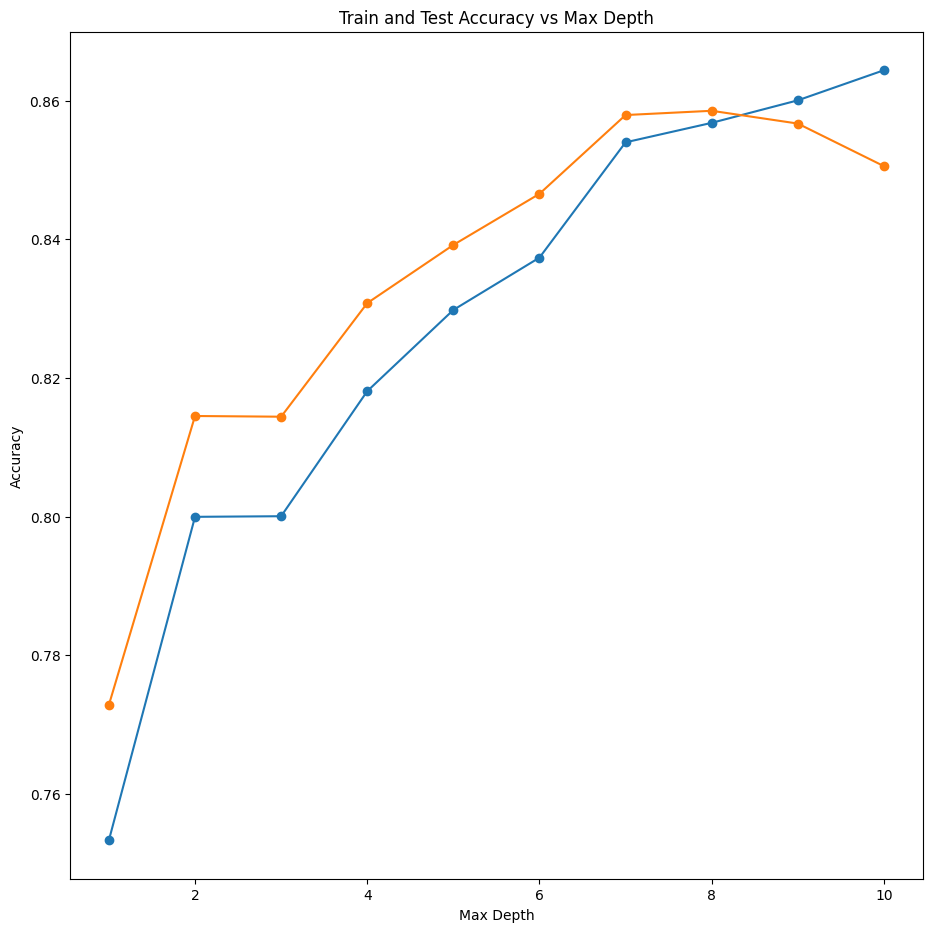

In [64]:
plt.figure(figsize=(11,11))
plt.plot(depth_data['max_depth'], depth_data['train_accuracy'], marker = 'o')
plt.plot(depth_data['max_depth'], depth_data['test_accuracy'], marker = 'o')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.title('Train and Test Accuracy vs Max Depth')
plt.show()

In [66]:
#complete the code below to create an image of the decision tree
dt_model = DecisionTreeClassifier(max_depth=8, random_state=42)
dt_model.fit(x_train, y_train)
print(dt_model.score(x_train, y_train))
print(dt_model.score(x_test, y_test))

0.8567918567918568
0.8585320913092436


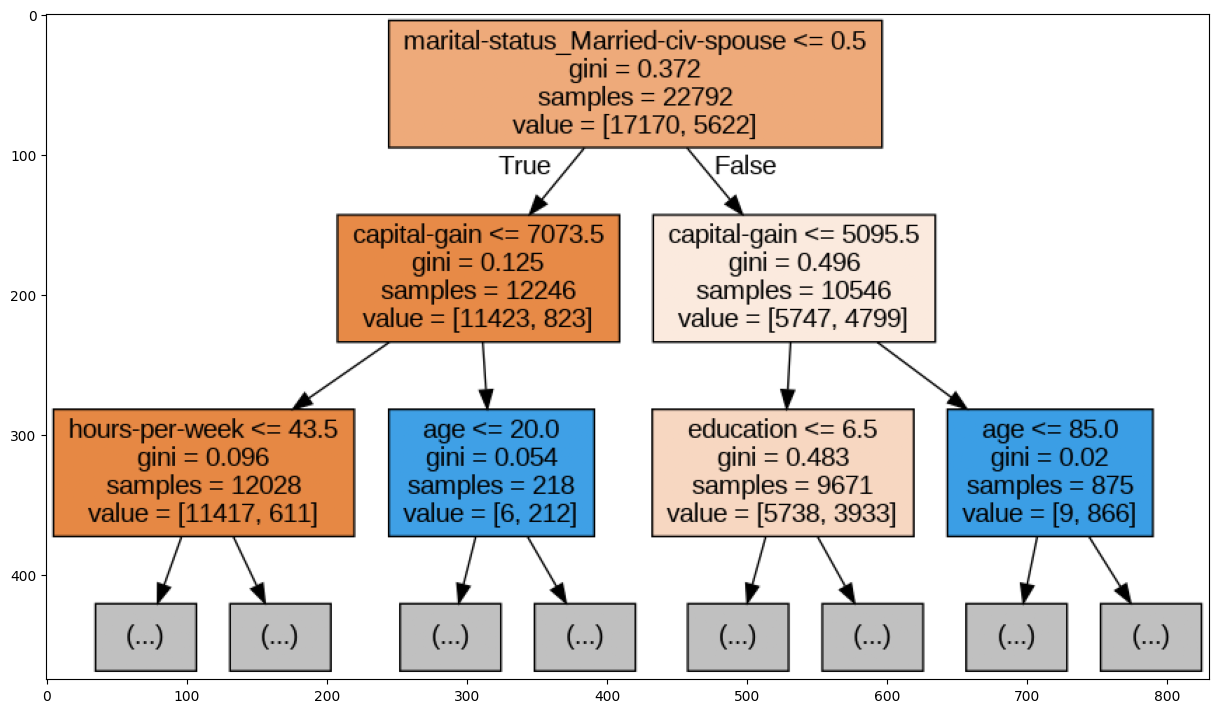

In [68]:
from sklearn import tree
!pip install graphviz
decision_tree = tree.export_graphviz(dt_model, out_file='tree.dot', feature_names=x_train.columns, max_depth=2, filled=True)
!dot -Tpng tree.dot -o tree.png # to convert the file
image = plt.imread('tree.png')
plt.figure(figsize=(15,15))
plt.imshow(image)

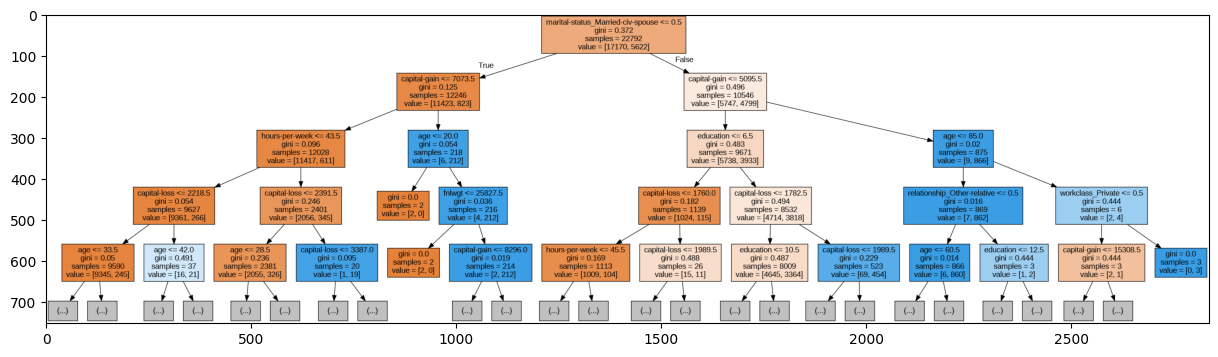

In [70]:
decision_tree = tree.export_graphviz(dt_model, out_file='tree.dot', feature_names=x_train.columns, max_depth=4 , filled=True) #max depth as 4
!dot -Tpng tree.dot -o tree.png # to convert the file
image = plt.imread('tree.png')
plt.figure(figsize=(15,15))
plt.imshow(image)

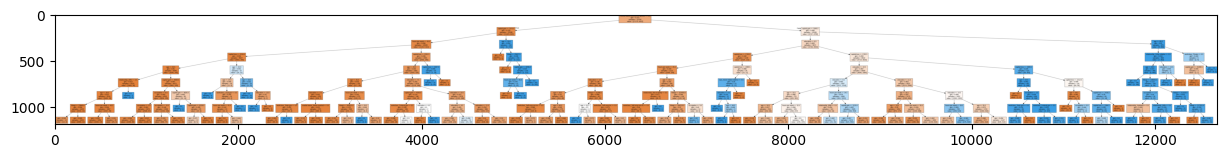

In [71]:
decision_tree = tree.export_graphviz(dt_model, out_file='tree.dot', feature_names=x_train.columns, max_depth=8, filled=True) #max depth as 8
!dot -Tpng tree.dot -o tree.png # to convert the file
image = plt.imread('tree.png')
plt.figure(figsize=(15,15))
plt.imshow(image)

<b>print the test accuracy and train accuracy here</b>

In [72]:
#write code here
print(dt_model.score(x_train, y_train))
print(dt_model.score(x_test, y_test))

0.8567918567918568
0.8585320913092436


### Explain the different hyperparameters you changed and how did it affect the models. Also give a summary of the graphs you made.

ffghjvbbbFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFAns:

## Optimizing Methods

We can even use Ensemble Methods like **bagging (random forest)**, **boosting (adaboost)** and **Pruning** to improve your accuracy. Again creating a loop of hyperparameters and then finding the best among them is a daunting task. To reduce the efforts, we can use a special technique known as **GridSearchCV**. It finds the best hyperparameters for your model without you having to write multiple loops and evaluating them.

1. GridSearchCV for Random Forest Classifier: https://youtu.be/c4mS7KaOIGY
2. GridSearchCV for Adaboost Classifier: https://youtu.be/JmXnztjULnQ

### 1. Bagging

* Theory : https://www.youtube.com/watch?v=KIOeZ5cFZ50
* Theory :
https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html
* Implementation : https://www.youtube.com/watch?v=MxiktOPmhV8&t=2s

In [73]:
#implement Random forest
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(x_train,y_train)

RandomForestClassifier()

In [74]:
y_pred = rf.predict(x_test)
y_pred

array([0, 0, 1, ..., 0, 0, 0])

In [79]:
#find the accuracy
from sklearn.metrics import roc_curve,auc
false_positive_rate,true_positive_rate,thresholds = roc_curve(y_test,y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

0.7758256956029952

[0.9092646473511687, 0.8686875153709105, 0.9532840966939308, 0.9337621338252853, 0.9704495630051424, 0.9575506263665479, 0.9793667941092558, 0.9706148177753301, 0.9849201914353027, 0.9784671853461948, 0.9989343387851246, 0.9999708794408853]
[0.7381661986038698, 0.696941167341652, 0.7545504657249701, 0.7218240123676019, 0.7558071322623101, 0.7406464638626671, 0.7611334083427592, 0.7502692878183299, 0.7644180153938442, 0.7531460385771289, 0.7714378829435131, 0.7770443998101884]


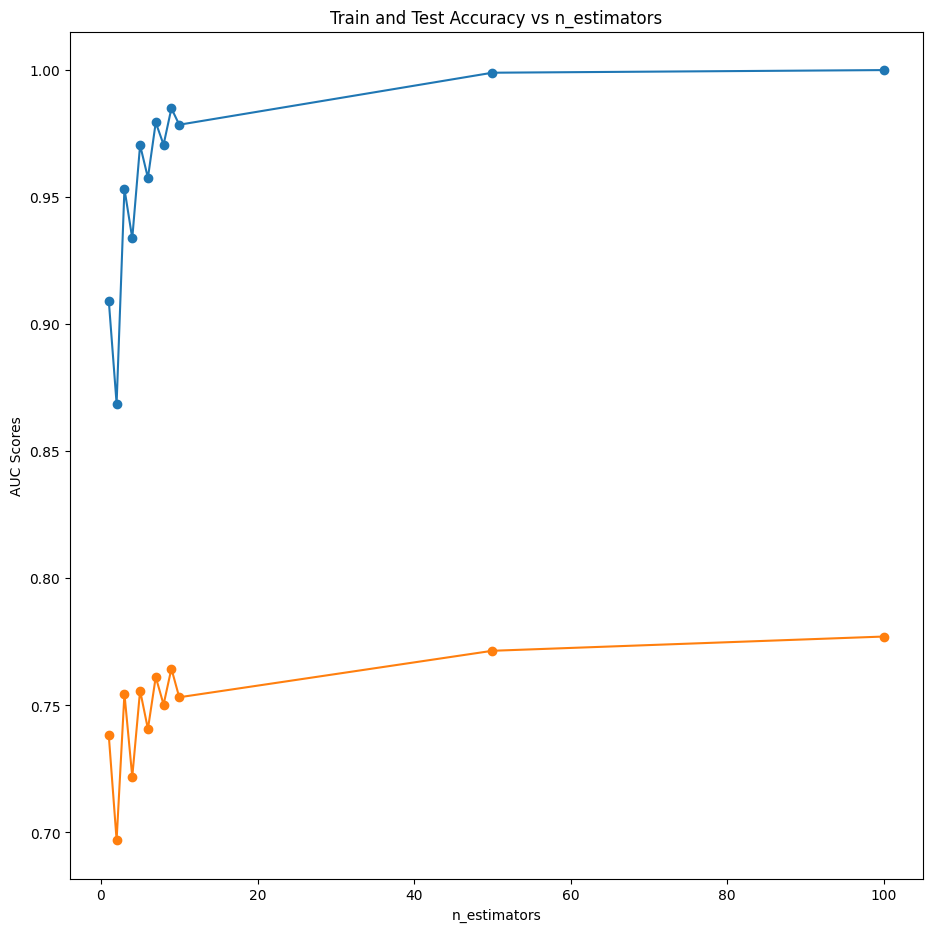

In [81]:
#finding the best accuracy
n_estimators = [1,2,3,4,5,6,7,8,9,10,50,100]
train_results=[]
test_results=[]
for est in n_estimators:
  rf = RandomForestClassifier(n_estimators = est, n_jobs=-1, random_state=12)
  rf.fit(x_train,y_train)
  ytrain_pred = rf.predict(x_train)
  false_positive_rate,true_positive_rate,thresholds = roc_curve(y_train, ytrain_pred)
  roc_auc = auc(false_positive_rate, true_positive_rate)
  roc_auc
  train_results.append(roc_auc)
  ytest_pred = rf.predict(x_test)
  false_positive_rate,true_positive_rate,thresholds = roc_curve(y_test,ytest_pred)
  roc_auc = auc(false_positive_rate, true_positive_rate)
  roc_auc
  test_results.append(roc_auc)

print(train_results)
print(test_results)

plt.figure(figsize=(11,11))
plt.plot(n_estimators, train_results, marker = 'o')
plt.plot(n_estimators, test_results, marker = 'o')
plt.xlabel('n_estimators')
plt.ylabel('AUC Scores')
plt.title('Train and Test Accuracy vs n_estimators')
plt.show()

### Explain the difference between random forest and decision tree. Also think of cases where the outputs for both of them can be same if its possible.

Ans:SSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSS

In [ ]:
#write a code to implement BaggingClassifier


### Explain how are Bagging and Random Forest different and why do we do bagging?


Ans:

### 2. Boosting

* Theory : https://www.youtube.com/watch?v=NLRO1-jp5F8&t=724s
* Theory :
https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html
*   Theory:https://www.geeksforgeeks.org/ml-xgboost-extreme-gradient-boosting/
* Implementation : https://www.youtube.com/watch?v=7xHM93WXOu8

In [ ]:
#write code here

Just to make things more interesting implement XGBoost as well and compare its accuracy with that of AdaBoost :)

### Explain: What is the difference between Adaboost and XGBoost. Also describe in what cases is XGBoost better to use than AdaBoost.

Ans:

## Explain: What is the difference between Bagging and Boosting? Explain with examples

Ans:

### 3. Pruning Techniques



*   Theory: https://opendatascience.com/what-is-pruning-in-machine-learning/
*   Theory:https://towardsdatascience.com/build-better-decision-trees-with-pruning-8f467e73b107



In [ ]:
#implement pruning

In [ ]:
#plot a tree (image) similar to one created for decision tree (graphwiz) for the pruning technique

In [ ]:
#write your code here

<b>Note that the accuracy on the test set will be considered and brownie points for *not* overfitting the model in the process</b>

As a brush up on data visualisation... make a graph to compare the accuracies you achieved for each of the models you trained and explain which one is the best to perform classification tasks and why?

In [ ]:
#write your code here

# **Bonus: To be done only if you have completed the above tasks.**

Ensemble Models are not only used for classification but also for Regression.Research on the various regression models such as XGBoost Regressor and Random Forest regressor and how are they different from the Linear Regression model we made in Task 2. The best research will be edited and featured on the Synapse Instagram page. Happy coding! :)

# **End of Task**

> ©DJS Synapse 2024 - 2025